# Quantum Cosine Classifier

#### Import modules and packages

In [1]:
%matplotlib inline

from Utils import *
from modeling import * 

In [2]:
x_train = normalize_custom(uniform(-10,10,2))
x_test = normalize_custom(uniform(-10,10,2))
y_train = [0,1]

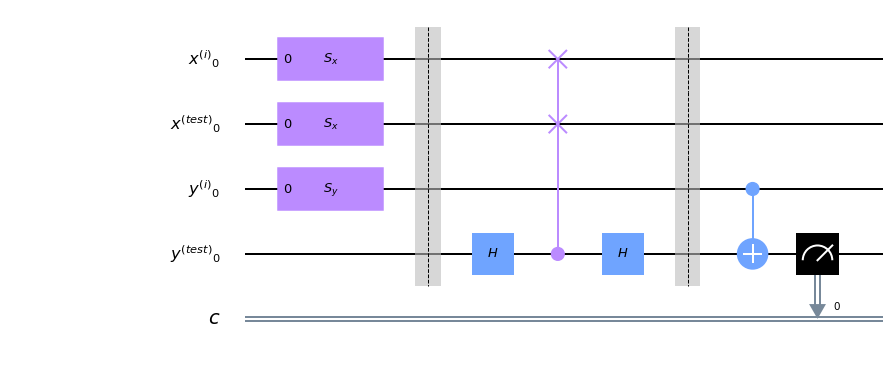

In [5]:
qc = quantum_cosine_classifier(x_train, x_test, y_train)
qc.draw(output='mpl', scale=1)

## Quantum Algorithm for Swap-Test

The swap test is a procedure to measure how much two quantum states differ. If we encode in the amplitudes of two different qubits ( $\left|a\right\rangle$, $\left|b\right\rangle$ ), two 2-dimensional vectors ($a$, $b$), the output of the swap test will be function of the distance between the two vectors. The swap test is performed into two steps:

### Step 1: State Preparation

$a$ and $b$ are encoded into the amplitudes of two different qubits. The quantum system contains an additional qubit that will store the results:

$$ \left|\Phi_1\right\rangle = \Big( S_{x} \otimes S_{x} \otimes S_{y} \otimes  \mathbb{1}  \Big) \left|0\right\rangle \left|0\right\rangle \left|0\right\rangle \left|0\right\rangle  = \left|x^{(train)}\right\rangle \left|x^{(test)}\right\rangle \left|y^{(train)}\right\rangle \left|0\right\rangle
$$

where $S_x$ is the routine which encodes in the amplitudes of a qubit a real vector $x$.

### Step 2: Execution of the swap test

\begin{align}
\left|\Phi_2\right\rangle = & \big(\mathbb{1} \otimes \mathbb{1} \otimes \mathbb{1} \otimes H\big)
\big(\text{(c)swap} \otimes \mathbb{1} \otimes C \big) 
\big(\mathbb{1} \otimes \mathbb{1} \otimes \mathbb{1} \otimes H\big) 
\left|x^{(train)}\right\rangle \left|x^{(test)}\right\rangle \left|y^{(train)}\right\rangle \left|0\right\rangle \\ 
   =  & \frac{1}{2} 
   \Big(
   \big( \left|x_i\right\rangle \left|x_j\right\rangle + \left|x_j\right\rangle \left|x_i\right\rangle \big)\left|y^{(train)}\right\rangle  \left|0\right\rangle + 
  \big(\left|x_i\right\rangle \left|x_j\right\rangle - \left|x_j\right\rangle \left|x_i\right\rangle \big)\left|y^{(train)}\right\rangle  \left|1\right\rangle \Big)
\end{align}

where $H$ is the Hadamard gate, $c-SWAP$ is the controlled-swap operation which uses the third qubit as control qubit and swap $\left|a\right\rangle$ and $\left|b\right\rangle$ if the controlled qubits is equal to $\left|1\right\rangle$.

\begin{align}
    P(y^{(test)} = \left|0\right\rangle) = 
    \frac{1}{2}+\frac{|\langle x^{(i)}|x^{(test)} \rangle|^2}{2}
\end{align}

### Step 3: Controlled Pauli-*X* gate

$$
\left|\Phi_3\right\rangle = \big(\mathbb{1} \otimes \mathbb{1} \otimes \text{C-X} \big) \left|\Phi_2\right\rangle
$$

\begin{align}\label{equation:cosine classifier}
    Pr\Big(y^{(test)} = y^{(i)}\Big) = \frac{1}{2}+\frac{\Big[d\big(x^{(i)}, x^{(test)}\big)\Big]^2}{2}
\end{align}

Measuring the first qubits produces the state $0$ with probability:
$$P\big(\left|0\right\rangle\big) = \frac{1+|\left\langle a|b \right\rangle|^2 }{2}$$

This probability is $1$ if $a=b$

### Execute quantum swap-test

In [ ]:
# Swap test using x1 as training on simulator
qc = quantum_swap_test(a,b)
measurement = exec_simulator(qc)
results = retrieve_proba(measurement)

print('The probability of state 0 is computed by quantum swap-test is:', results[0] )

In [ ]:
print('The same probability computed classically is:', classic_swap_test(a, b))